In [5]:
import numpy as np
import pandas as pd
from skimpy import skim
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

# LOAD THE DATA

In [8]:
dataset=pd.read_csv("C:\\Users\\DELL\\Downloads\\PRCP-1028-Skin-Disorder-Prediction-20220512T101734Z-001 (1)\\PRCP-1028-Skin-Disorder-Prediction\\dataset_35_dermatology (1).csv")
dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [10]:
dataset.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [12]:
dataset.shape

(366, 35)

In [14]:
dataset.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

# EXAMING THE DATA

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

# STATISTICAL SUMMARY

In [20]:
dataset.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


# SUMMARY REPORT OF DATA

In [23]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 366    │ │ int32       │ 34    │                                                          │
│ │ Number of columns │ 35     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ erythema                  │   0 │      0 │    2.068 │   0.6648 │   0 │    2 │    2 │    2 │     3 │   ▂ ▇▃ │  │
│ │ scaling                   │   0 │      0 │    1.795 │   0.7015 │   0 │    1 │    2 │    2 │     3 │   ▅ ▇▂ │  │
│ │ definite_borders          │   0 │      0 │    1.549 │   0.9075 │   0 │    1 │    2 │    2 │     3 │ ▃ ▅ ▇▂ │  │
│ │ itching                   │   0 │      0 │    1.366 │    1.138 │   0 │    0 │    1 │    2 │     3 │ ▇ ▅ ▇▅ │  │
│ │ koebner_phenomenon        │   0 │      0 │   0.6339 │    0.908 │   0 │    0 │    0 │    1 │     3 │ ▇ ▂ ▂▁ │  │
│ │ polygonal_papules         │   0 │      0 │   0.4481 │   0.9573 │   0 │    0 │    0 │    0 │     3 │ ▇   ▁▁ │  │
│ │ follicular_papules        │   0 │      0 │   0.1667 │   0.5706 │   0 │    0 │    0 │    0 │     3 │   ▇    │  │
│ │ oral_mucosal_involvement  │   0 │      0 │    0.377 │   0.8341 │   0 │    0 │    0 │    0 │     3 │ ▇   ▁  │  │
│ │ knee_and_elbow_involvemen │   0 │      0 │   0.6148 │    0.983 │   0 │    0 │    0 │    1 │     3 │ ▇ ▁ ▂▁ │  │
│ │ t                         │     │        │          │          │     │      │      │      │       │        │  │
│ │ scalp_involvement         │   0 │      0 │   0.5191 │   0.9056 │   0 │    0 │    0 │    1 │     3 │ ▇ ▁ ▂  │  │
│ │ family_history            │   0 │      0 │   0.1257 │   0.3319 │   0 │    0 │    0 │    0 │     1 │ ▇    ▁ │  │
│ │ melanin_incontinence      │   0 │      0 │   0.4044 │   0.8698 │   0 │    0 │    0 │    0 │     3 │ ▇   ▁  │  │
│ │ eosinophils_in_the_infilt │   0 │      0 │   0.1393 │   0.4118 │   0 │    0 │    0 │    0 │     2 │  ▇  ▁  │  │
│ │ rate                      │     │        │          │          │     │      │      │      │       │        │  │
│ │ PNL_infiltrate            │   0 │      0 │   0.5464 │   0.8155 │   0 │    0 │    0 │    1 │     3 │ ▇ ▂ ▂  │  │
│ │ fibrosis_of_the_papillary │   0 │      0 │   0.3361 │   0.8531 │   0 │    0 │    0 │    0 │     3 │ ▇   ▁▁ │  │
│ │ _dermis                   │     │        │          │          │     │      │      │      │       │        │  │
│ │ exocytosis                │   0 │      0 │    1.369 │    1.104 │   0 │    0 │    2 │    2 │     3 │ ▇ ▃ ▇▃ │  │
│ │ acanthosis                │   0 │      0 │    1.956 │   0.7125 │   0 │    2 │    2 │    2 │     3 │   ▃ ▇▃ │  │
│ │ hyperkeratosis            │   0 │      0 │   0.5273 │   0.7571 │   0 │    0 │    0 │    1 │     3 │ ▇ ▃ ▂  │  │
│ │ parakeratosis             │   0 │      0 │     1.29 │   0.9176 │   0 │    1 │    1 │    2 │     3 │ ▅ ▇ ▇▂ │  │
│ │ clubbing_of_the_rete_ridg │   0 │      0 │   0.6639 

# EXPLORATARY DATA ANALYSIS

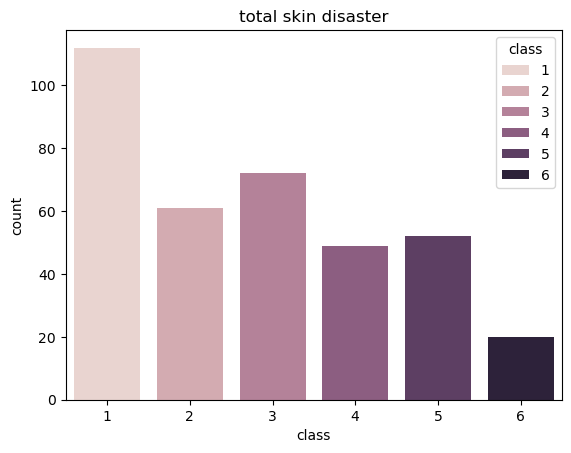

In [26]:
# Target distribution
sns.countplot(dataset,x=dataset["class"], hue="class")
plt.title("total skin disaster")
plt.show()

In [27]:
# Check exact counts
print(dataset['class'].value_counts(normalize=True) * 100)

class
1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: proportion, dtype: float64


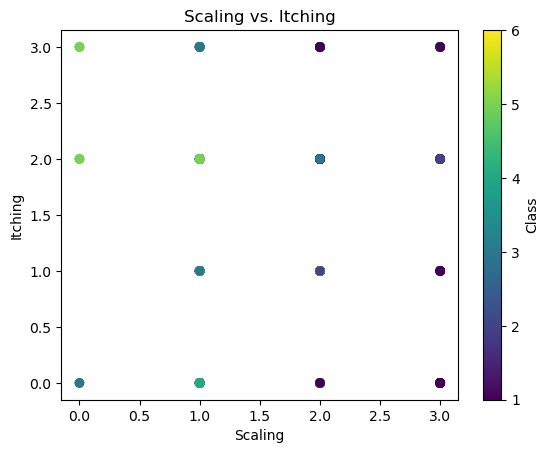

In [30]:
plt.scatter(dataset['scaling'], dataset['itching'], c=dataset['class'], cmap='viridis')
plt.title("Scaling vs. Itching")
plt.xlabel("Scaling")
plt.ylabel("Itching")
plt.colorbar(label="Class")
plt.show()

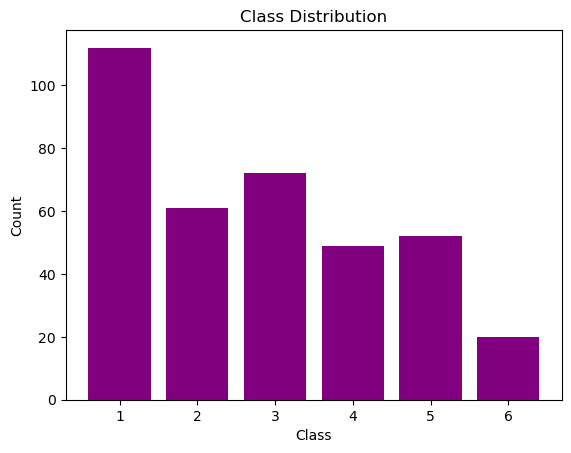

In [31]:
from collections import Counter

# Example: Class distribution
class_counts = Counter(dataset['class'])
plt.bar(class_counts.keys(), class_counts.values(), color='purple')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# DATA PREPROCESSING

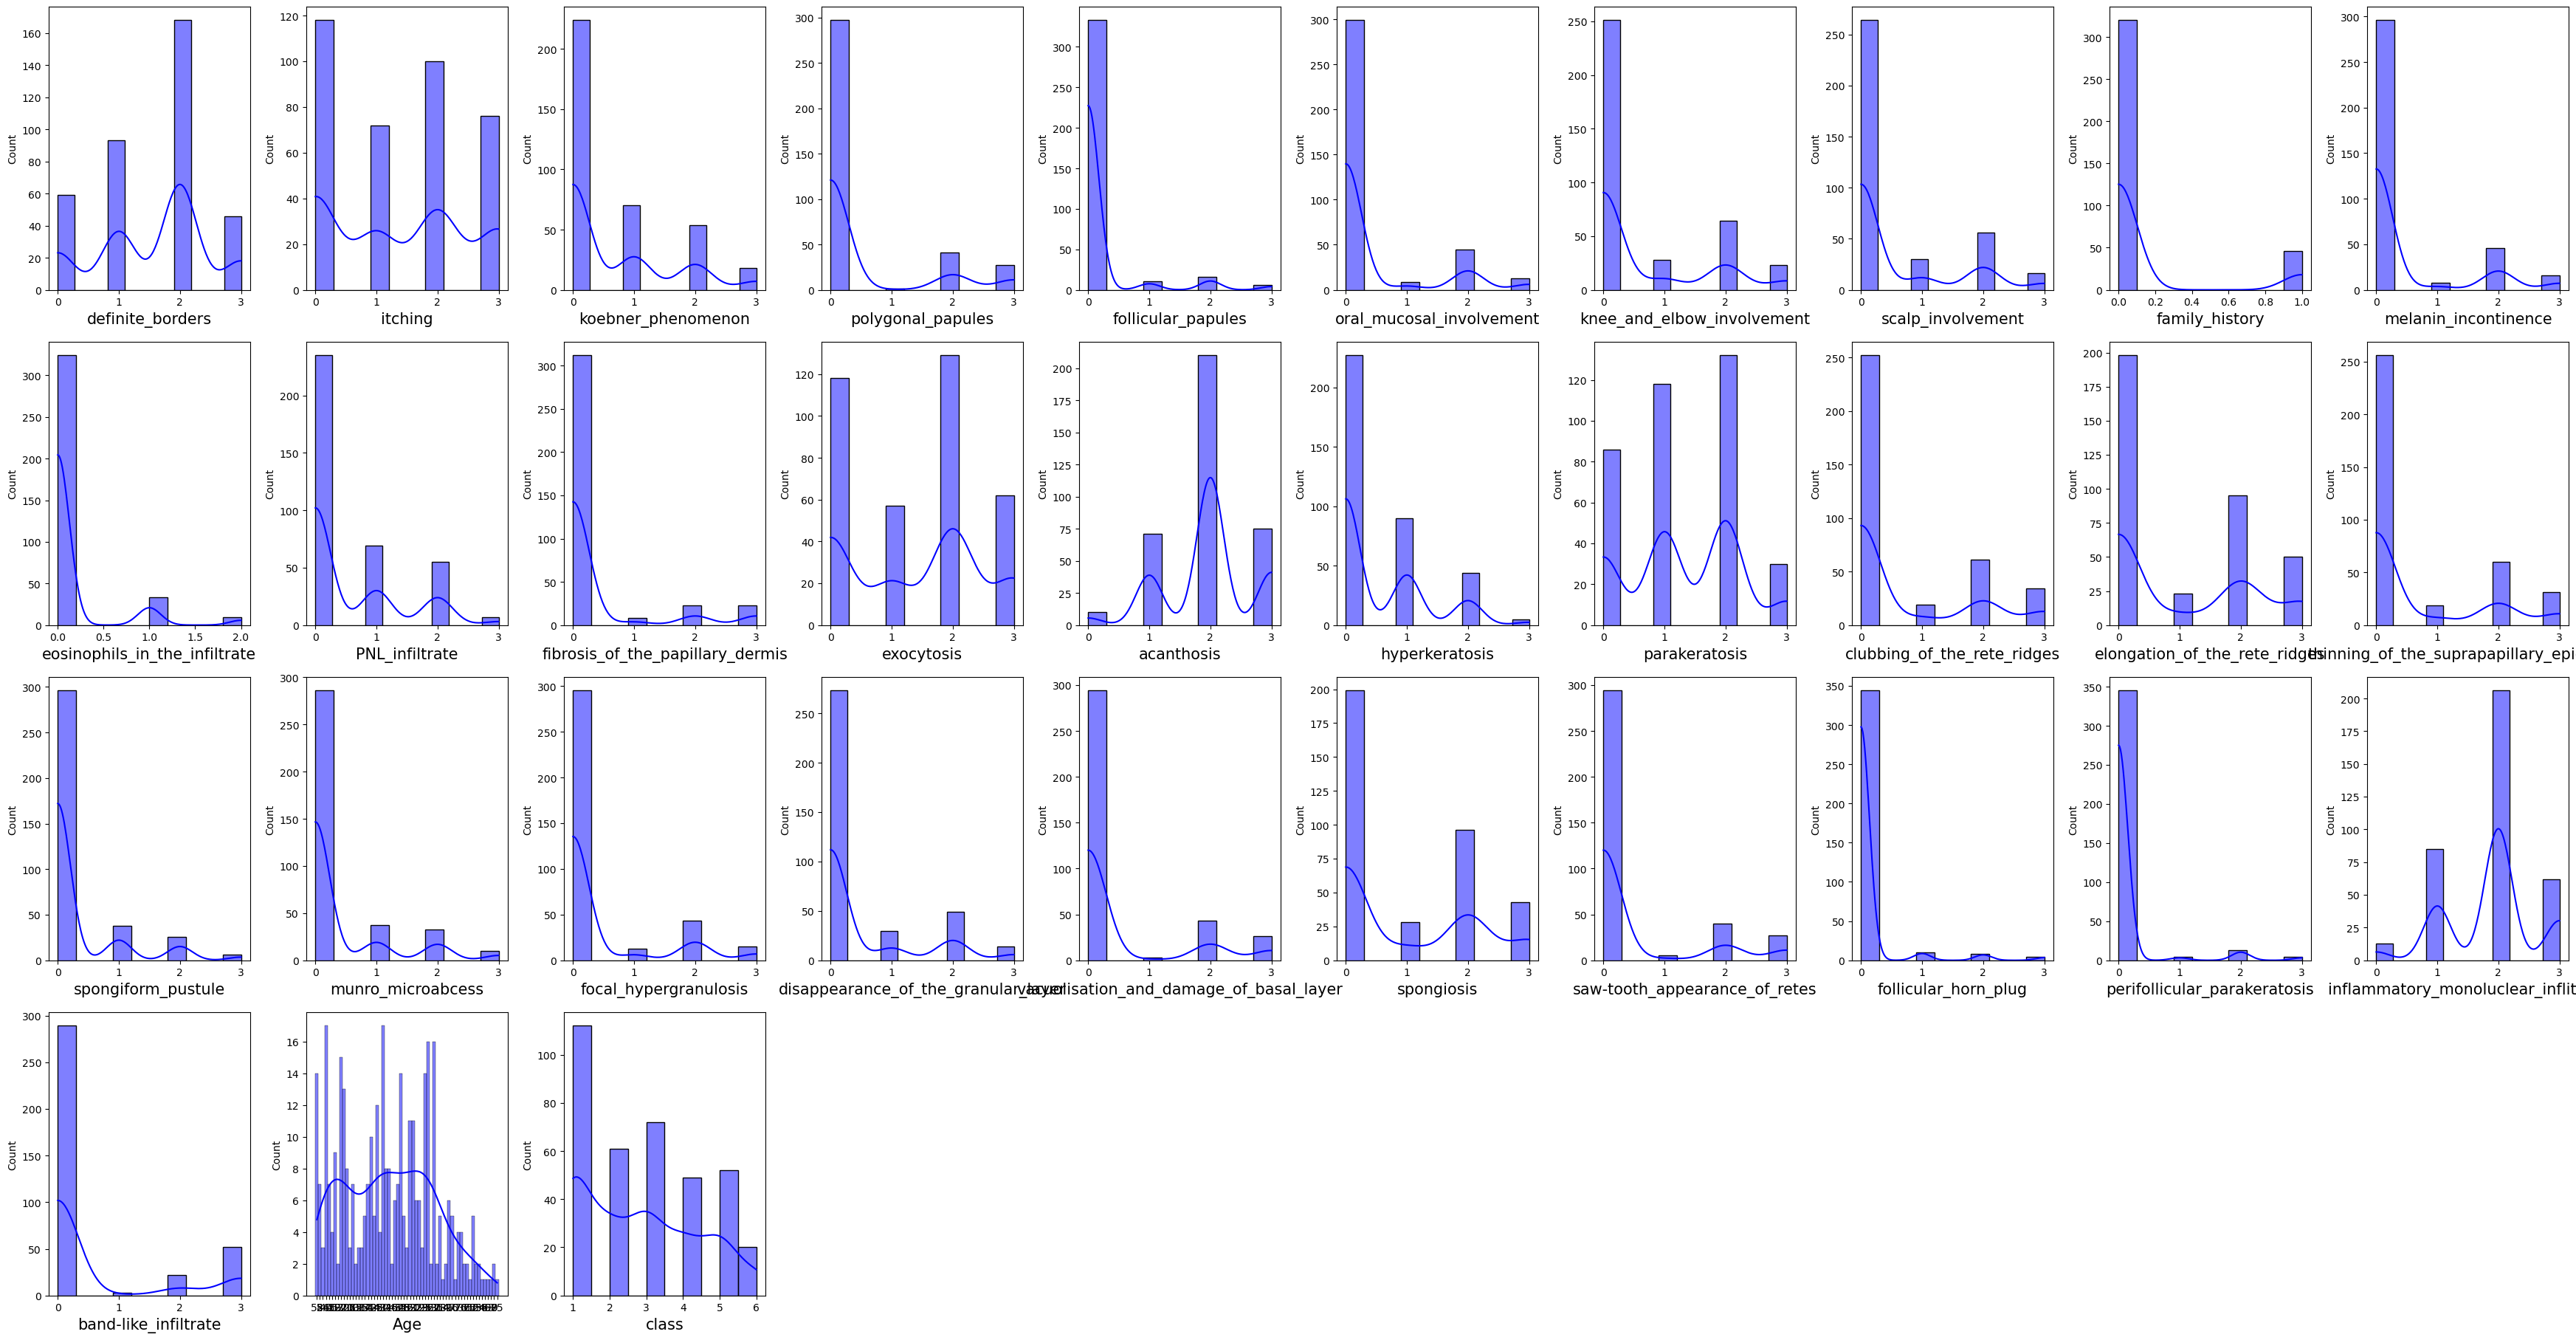

In [188]:
dist = dataset.iloc[:,2:102]
plt.figure(figsize=(35,45),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist: # Iterating the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 columns
        sns.histplot(dist[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # assigning name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show()

123.45


# HANDLING MISSING VALUES

In [156]:
dataset.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

# CHECKING DUPLICATION

In [190]:
dataset.duplicated().sum()

0

In [195]:
dataset.drop('class', axis=1)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50


# MODEL CREATION

In [44]:
X = dataset.drop(['class'], axis=1)  # Features
y = dataset['class']  # Target

In [46]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [48]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(256, 34)
(110, 34)
(256,)
(110,)


# Logistic Regeression

In [99]:
dataset=pd.read_csv("C:\\Users\\DELL\\Downloads\\PRCP-1028-Skin-Disorder-Prediction-20220512T101734Z-001 (1)\\PRCP-1028-Skin-Disorder-Prediction\\dataset_35_dermatology (1).csv")
dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [101]:
dataset.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [103]:
dataset.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [142]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')


In [146]:
# Handle missing values (if any) by filling with the mean (for simplicity)
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)


In [150]:
# Define features (X) and target (y)
X = dataset.drop(columns=['class'])  # Features
y = dataset['class']  # Target variable

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [156]:
y_pred = log_reg.predict(X_test)


In [158]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [160]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[30  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.96        74
   macro avg       0.91      0.92      0.91        74
weighted avg       0.96      0.96      0.96        74

